## Q5: Planetary orbits

We want to consider planetary orbits.  To do this, we need to solve Newton's second law together with Newton's law of gravity.  If we restrict ourselves to the x-y plane, then there are 4 quantities we need to solve for: $x$, $y$, $v_x$, and $v_y$.  These evolve according to:

\begin{align*}
\frac{dx}{dt} &= v_x \\
\frac{dy}{dt} &= v_y \\
\frac{dv_x}{dt} &= a_x = -\frac{GM_\star x}{r^3} \\
\frac{dv_y}{dt} &= a_y = -\frac{GM_\star y}{r^3}
\end{align*}

To integrate these forward in time, we need an initial condition for each quantity.  We'll setup our system such that the Sun is at the origin (that will be one focus), and the planet begins at perihelion and orbits counterclockwise. 

![orbit_setup.png](attachment:orbit_setup.png)

The distance of perihelion from the focus is:

$$r_p = a (1 - e)$$

where $a$ is the semi-major axis and $e$ is the eccentricity.  The perihelion velocity is all in the $y$ direction and is:

$$v_y = v_p = \sqrt{\frac{GM_\star}{a} \frac{1+e}{1-e}}$$

We'll work in units of AU, years, and solar masses, in which case, $GM_\star = 4\pi^2$ (for the Sun).  

Your initial conditions should be:

  * $x(t=0) = r_p$
  * $y(t=0) = 0$
  * $v_x(t=0) = 0$
  * $v_y(t=0) = v_p$

In [86]:
def rhs(t, X):
    
    r = np.sqrt(X[0]**2 + X[1]**2)
    
    #dx = vx
    xdot = X[2] 
    
    #dy = vy
    ydot = X[3]
    
    #dvx= -GM*x/r^3
    vxdot = -G*X[0]/(r**3)
    
    #dvy= -GM*y/r^3
    vydot = -G*X[1]/(r**3)
    
    return np.array([xdot, ydot, vxdot, vydot])

def ode_integrate(X0, dt, tmax):
    """ integrate using the VODE method, storing the solution each dt """

    r = integrate.solve_ivp(rhs, (0.0, tmax), X0,
                            method="RK45",rtol=1.e-7, dense_output=True)
    
    
    # get the solution at intermediate times
    ts = np.arange(0.0, tmax, dt)
    
    Xs = r.sol(ts)
    return ts, Xs

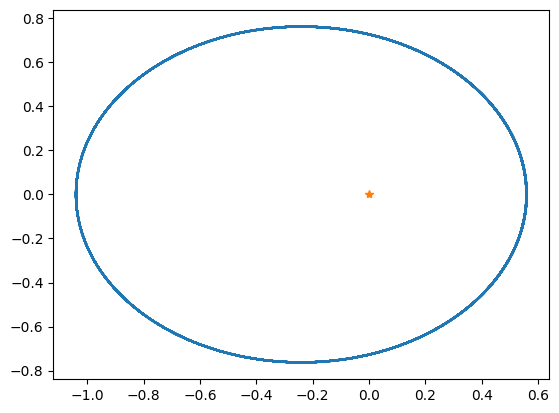

In [115]:
a = 0.8
e = 0.3

G = 4.0*(np.pi**2)
vp = np.sqrt(G*(1+e)/(a*(1-e)))
rp = a*(1-e)

X0 = np.array([rp, 0, 0, vp])

t,X = ode_integrate(X0, 0.01, 20)

plt.plot(X[0,:], X[1,:])
plt.plot(0,0,'*')


## Q7: Noisy signal

A common use of a convolution is to smooth noisy data, for example by convolving noisy data with a Gaussian.  We'll do that here.

Here's some noisy data we'll work with

In [116]:
import numpy as np
import matplotlib.pyplot as plt

def fdata(x, L):
    A = L/10.0
    return 2*np.sin(2*np.pi*x/L) + x*(L-x)**2/L**3 * np.cos(x) + \
           5*x*(L-x)/L**2 + A/2 + 0.1*A*np.sin(13*np.pi*x/L)

N = 2048
L = 50.0
x = np.linspace(0, L, N, endpoint=False)
orig = fdata(x, L)
noisy = orig + 0.5*np.random.randn(N)

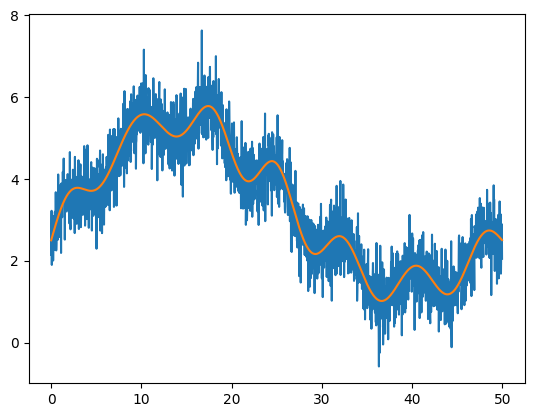

In [117]:
plt.plot(x, noisy)
plt.plot(x, orig)

Convolve the noisy data with a Gaussian and plot the result together with the original data `orig`.  You'll need to play with the width of the Gaussian to get a nice smoothing.  You also will need to normalize the Gaussian so that it sums to 1, otherwise, your convolved data will be shifted verfically from the original function.

In [135]:
from scipy.signal.windows import gaussian
from scipy import integrate

Integral of the convolved gaussian: 1.0


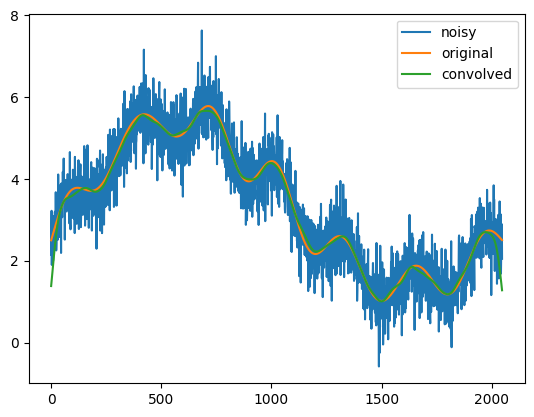

In [148]:
Std= 20

gaus=gaussian(N,std=Std) #define the gaussian over the whole dataset to account for all possibles std
#plt.plot(gaus)
norm=integrate.simpson(gaus)
#print(norm)
gaus[:]=gaus[:]/norm #normalizzo la gaussiana
norm2=integrate.simpson(gaus)
print('Integral of the convolved gaussian: ' + str(norm2))

Conv = signal.convolve(noisy, gaus, mode='same', method='auto')
plt.plot(noisy, label='noisy')
plt.plot(orig, label='original')
plt.plot(Conv, label='convolved')
plt.legend(loc="upper right")
